In [1]:
import os
import pickle
import neurokit2 as nk
import sensors_import_support as sis
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [2]:
# Import questionnaires and subjects data
with open('questionnaires.pkl', 'rb') as f:
    subject_data = pickle.load(f)
subject_data.describe()

,ID,Number,STAI_Total,Fatigue,Stress,Mental_Demand,Physical_Demand,Frustration,NASA_Total,PSS,NARS_S1,NARS_S2,NARS_S3,Age,Sex,Experience
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.00000,332.000000,332.000000,332.000000,332.000000
mean,5.581326,7.367470,36.671687,1.771084,8.786145,2.719880,2.566265,2.478916,37.024096,13.837349,11.000000,12.14759,9.774096,32.418675,0.590361,1.304217
std,2.824581,4.416109,9.457364,0.849031,3.137251,1.430092,1.540532,1.649730,21.810071,3.435736,3.651759,3.20864,2.009086,5.884796,0.492509,0.460769
min,1.000000,1.000000,20.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.000000,9.000000,6.000000,7.00000,7.000000,26.000000,0.000000,1.000000
25%,3.000000,3.000000,30.000000,1.000000,6.000000,2.000000,1.000000,1.000000,18.000000,12.000000,9.000000,9.00000,8.000000,26.000000,0.000000,1.000000
50%,6.000000,7.000000,35.500000,2.000000,8.000000,3.000000,2.000000,2.000000,38.000000,14.000000,10.000000,13.00000,9.000000,35.000000,1.000000,1.000000
75%,8.000000,11.000000,41.000000,2.000000,10.000000,4.000000,4.000000,3.000000,53.000000,15.000000,12.000000,14.00000,11.000000,37.000000,1.000000,2.000000
max,10.000000,15.000000,67.000000,4.000000,23.000000,7.000000,7.000000,7.000000,86.000000,22.000000,19.000000,17.00000,14.000000,41.000000,1.000000,2.000000


In [3]:
# Import signals
signals, fs = sis.import_opensignals('signals_example.txt')
signals[0:10]

,time,ECG,EMG,EDA
0,0.0,-0.00665,-0.04936,4.4125
1,1.0,-0.00773,-0.11435,4.3915
2,2.0,-0.00863,-0.11975,4.3976
3,3.0,-0.00809,-0.12148,4.4014
4,4.0,-0.00683,-0.16526,4.4090
5,5.0,-0.00782,-0.14805,4.3922
6,6.0,-0.00863,-0.05718,4.3995
7,7.0,-0.00907,0.01549,4.4075
8,8.0,-0.00988,0.03701,4.3915
9,9.0,-0.00858,0.05581,4.4052


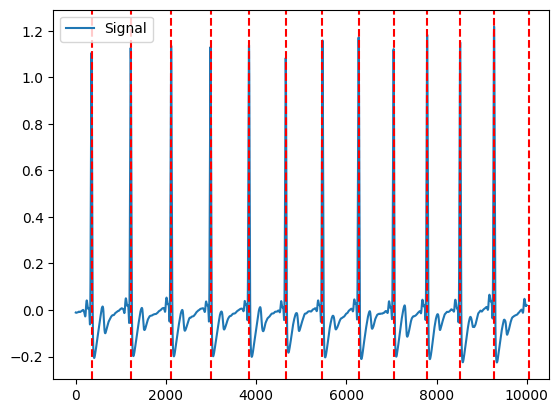

In [4]:
# Plot ecg with R peaks (only a subset, otherwise the plot becomes unreadable!)
ecg_processed, ecg_info = nk.ecg_process(signals['ECG'], sampling_rate=fs)
rpeaks = ecg_info["ECG_R_Peaks"]
cleaned_ecg = ecg_processed["ECG_Clean"]
plot = nk.events_plot(rpeaks[0:13], cleaned_ecg[0:10000])

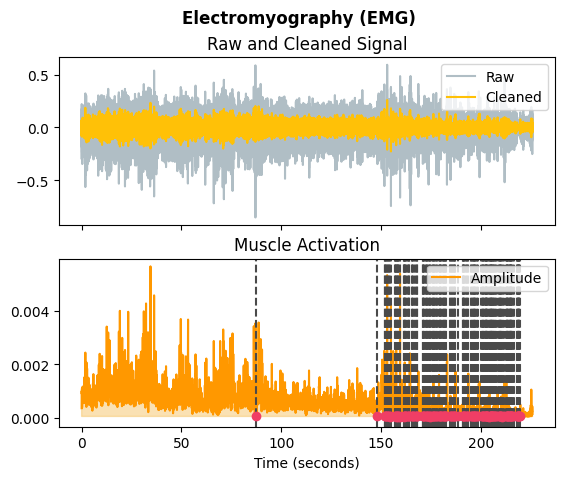

In [5]:
# Plot filtered emg
emg_processed, _ = nk.emg_process(signals['EMG'], sampling_rate=fs)
plot = nk.emg_plot(emg_processed, fs)

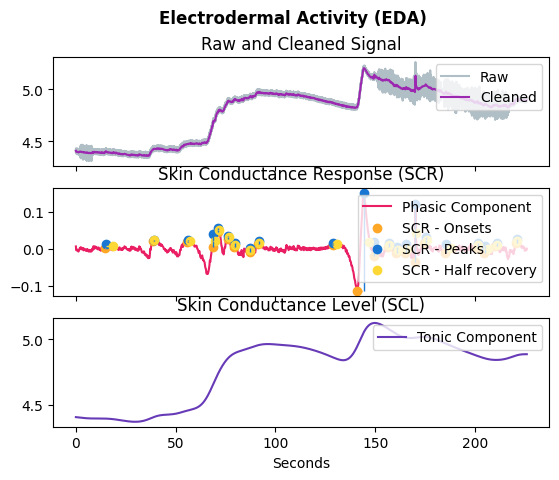

In [6]:
# Plot filtered eda
eda_processed, features = nk.eda_process(signals['EDA'], sampling_rate=fs, method="neurokit")
plot = nk.eda_plot(eda_processed, fs)

In [27]:
# Extraction of features

fs = 1000
window = 30
experiment_type = 'manual'
load_path = os.path.join(os.getcwd(), 'experiments', experiment_type)

In [30]:
# ECG 
# do not run it since there is the csv loaded after
dataframe_ECG = sis.extract_plux_data_windowed(load_path, 0, window, 'ECG')
ecg_time_and_freq_features = sis.extract_time_and_freq_hrv_features(dataframe_ECG, fs)

 63%|██████▎   | 89/141 [02:04<01:12,  1.40s/it]


KeyboardInterrupt: 

In [29]:
# EDA
# have to fix this and make it a pd.DataFrame()
dataframe_EDA = sis.extract_plux_data_windowed(load_path, 0, window, 'EDA')
eda_time_and_freq_features = sis.extract_eda_time_and_frequency_features(dataframe_EDA, fs, window)

 50%|█████     | 71/141 [01:56<01:55,  1.65s/it]

KeyboardInterrupt



In [28]:
# EMG
# do not run is since there is the csv loaded after
dataframe_EMG = sis.extract_plux_data_windowed(load_path, 0, window, 'EMG')
emg_time_and_freq_features = sis.extract_emg_featues(dataframe_EMG, fs)

100%|██████████| 968/968 [08:05<00:00,  1.99it/s]


In [17]:
# ecg_time_and_freq_features.to_csv(Path("saved_data", f"ecg_time_and_freq_features_{experiment_type}.csv"), index=False)

In [31]:
emg_time_and_freq_features.to_csv(Path("saved_data", f"emg_time_and_freq_features_{experiment_type}.csv"), index=False)

In [ ]:
ecg_time_and_freq_features = pd.read_csv(Path("saved_data", f"ecg_time_and_freq_features_{experiment_type}.csv"))

In [ ]:
emg_time_and_freq_features = pd.read_csv(Path("saved_data", f"emg_time_and_freq_features_{experiment_type}.csv"))

In [ ]:
ecg_time_and_freq_features.head()

In [ ]:
emg_time_and_freq_features.head()